In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [11]:
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
last_date

('2017-08-23')

In [12]:
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(year_ago)

2016-08-23


In [13]:
precip = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= year_ago).\
    filter(measurement.prcp).all()
precip

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-28', 0.01),
 ('2016-08-31', 0.13),
 ('2016-09-04', 0.03),
 ('2016-09-07', 0.05),
 ('2016-09-09', 0.03),
 ('2016-09-11', 0.05),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-22', 0.02),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-10-17', 0.01),
 ('2016-10-21', 0.05),
 ('2016-10-22', 0.15),
 ('2016-10-23', 0.01),
 ('2016-10-25', 0.03),
 ('2016-10-30', 0.24),
 ('2016-10-31', 0.03),
 ('2016-11-08', 0.07),
 ('2016-11-19', 0.03),
 ('2016-11-20', 0.05),
 ('2016-11-21', 0.01),
 ('2016-11-22', 0.13),
 ('2016-11-23', 0.14),
 ('2016-11-24', 0.05),
 ('2016-11-25', 0.05),
 ('2016-11-26', 0.05),
 ('2016-11-28', 0.01),
 ('2016-11-30', 0.14),
 ('2016-12-01', 0.12),
 ('2016-12-02', 0.03),
 ('2016-12-04', 0.03),
 ('2016-12-05', 0.43),
 ('2016-12-06', 0.02),
 ('2016-12-08', 0.03),
 ('2016-12-09', 0.52),
 ('2016-12-10', 0.05),
 ('2016-12-11', 0.04),
 ('2016-12-

ConversionError: Failed to convert value(s) to axis units: 'date'

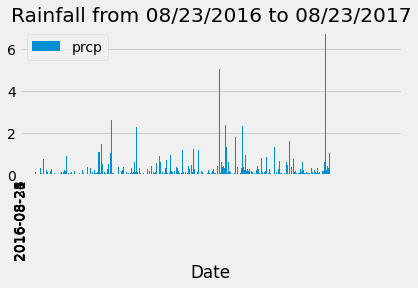

In [27]:
df = pd.DataFrame(precip)
df.set_index('date', inplace=True)
df.plot.bar()
x = np.asarray([i for i in range(len('date'))])
plt.tight_layout()
plt.title("Rainfall from 08/23/2016 to 08/23/2017")
plt.xlabel("Date")
plt.xticks(x)
plt.xticks('date', rotation=45)
plt.ylabel("Precipiation (inches)")
plt.show()

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [ ]:
# Design a query to show how many stations are available in this dataset?


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
